 In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

  - Evaluate the performance of your model with the metrics you have learned in this course.
  - Plot the ROC and the precision / recall curves for different "c" values.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, \
                            f1_score, roc_curve, roc_auc_score, log_loss, precision_recall_curve

import re

In [2]:
df = pd.read_csv('titanic_final.csv', index_col=0)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royal
0,0,3,22.0,1,0,7.2500,0,1,1,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,1,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,0,1,1,0,1,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Age            891 non-null    float64
 3   SibSp          891 non-null    int64  
 4   Parch          891 non-null    int64  
 5   Fare           891 non-null    float64
 6   Embarked_Q     891 non-null    int64  
 7   Embarked_S     891 non-null    int64  
 8   Sex_male       891 non-null    int64  
 9   Title_Miss     891 non-null    int64  
 10  Title_Mr       891 non-null    int64  
 11  Title_Mrs      891 non-null    int64  
 12  Title_Officer  891 non-null    int64  
 13  Title_Royal    891 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 104.4 KB


In [4]:
(df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)

Survived         0.0
Pclass           0.0
Age              0.0
SibSp            0.0
Parch            0.0
Fare             0.0
Embarked_Q       0.0
Embarked_S       0.0
Sex_male         0.0
Title_Miss       0.0
Title_Mr         0.0
Title_Mrs        0.0
Title_Officer    0.0
Title_Royal      0.0
dtype: float64

In [5]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
log = LogisticRegression(max_iter=1000, C=10000, solver='newton-cg')
log_model = log.fit(X_train, y_train)

In [8]:
y_pred_test = log_model.predict(X_test)
y_pred_train = log_model.predict(X_train)

## Performance Metrics

In [9]:
pred_test_proba = log_model.predict_proba(X_test)[:, 1]

In [10]:
pred_test_proba

array([0.79780159, 0.18113425, 0.09887389, 0.82059747, 0.69110864,
       0.92934028, 0.71693179, 0.0415893 , 0.71750976, 0.85296852,
       0.25892482, 0.05927553, 0.21654843, 0.14410487, 0.1660896 ,
       0.90560338, 0.23693171, 0.71700089, 0.14651669, 0.31954071,
       0.09091965, 0.36249105, 0.50313665, 0.09937297, 0.08444998,
       0.31350611, 0.99951856, 0.18273389, 0.34412151, 0.56628035,
       0.1009428 , 0.61643401, 0.48511164, 0.64783308, 0.10312296,
       0.09860089, 0.40436906, 0.71693179, 0.94983091, 0.08228047,
       0.11204861, 0.04957059, 0.08233054, 0.10973218, 0.80246846,
       0.02491665, 0.10104527, 0.09333228, 0.09061955, 0.30177842,
       0.53469377, 0.9067382 , 0.00968691, 0.92700322, 0.0505639 ,
       0.88190979, 0.17772833, 0.98488953, 0.76408105, 0.70334947,
       0.09677545, 0.78590756, 0.87784302, 0.32243281, 0.10973218,
       0.85401037, 0.26766441, 0.08179447, 0.08395148, 0.96262694,
       0.83769763, 0.91646502, 0.57391923, 0.88574082, 0.09283

In [11]:
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

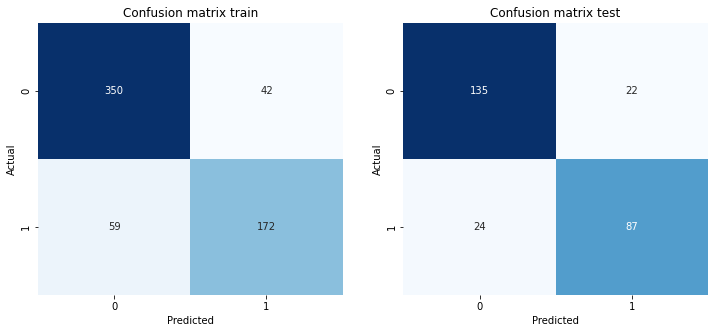

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion matrix train')  
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion matrix test') 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative count :", TN)
print("True positive count :", TP)
print("False positive count:", FP)
print("False negative count:", FN)

True negative count : 135
True positive count : 87
False positive count: 22
False negative count: 24


### Accuracy

In [14]:
print("Accuracy value for the model : ", log_model.score(X_test, y_test))
print("Calculated accuracy value    : ", (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() value       : ", accuracy_score(y_test, y_pred_test))

Accuracy value for the model :  0.8283582089552238
Calculated accuracy value    :  0.8283582089552238
accuracy_score() value       :  0.8283582089552238


### Error Rate

In [15]:
print("Error rate            : ",  1 - accuracy_score(y_test, y_pred_test))
print("Calculated error rate : ", (FN + FP) / (FN + FP + TN + TP))

Error rate            :  0.17164179104477617
Calculated error rate :  0.17164179104477612


### Precision

In [16]:
print("Calculated precision value : ", (TP) / (FP + TP))
print("precision_score() value    : ", precision_score(y_test, y_pred_test))

Calculated precision value :  0.7981651376146789
precision_score() value    :  0.7981651376146789


### Recall/Sensitivity

In [17]:
print("Calculated recall value : ", (TP) / (TP + FN))
print("recall_score() value    : ", recall_score(y_test, y_pred_test))

Calculated recall value :  0.7837837837837838
recall_score() value    :  0.7837837837837838


### Specificity

In [18]:
print("Calculated specificity value: ", (TN) / (TN + FP))

Calculated specificity value:  0.8598726114649682


### F1 Score

In [19]:
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

In [20]:
print("Calculated F1 score  for 1 : ",  2 * ((recall * precision) / (recall + precision)))
print("F1_score value for 1      : ",  f1_score(y_test, y_pred_test))
print("F1_score value for 0      : ",  f1_score(y_test, y_pred_test, pos_label=0))

Calculated F1 score  for 1 :  0.7909090909090909
F1_score value for 1      :  0.7909090909090909
F1_score value for 0      :  0.8544303797468354


### Classification Report

In [21]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       157
           1       0.80      0.78      0.79       111

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



### ROC/AUC

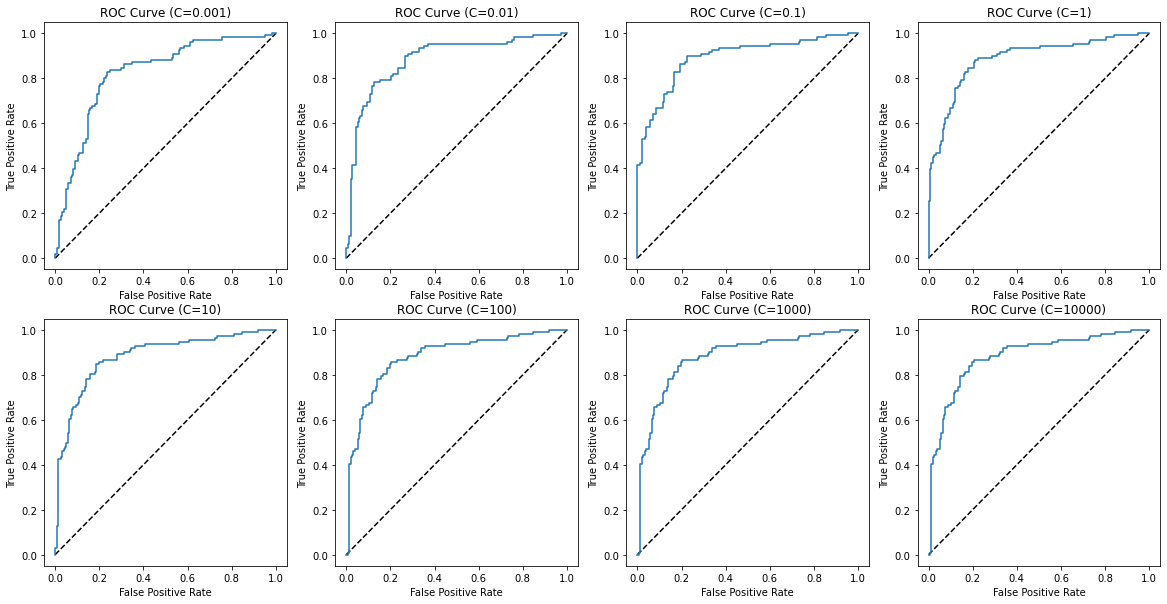

In [22]:
plt.figure(figsize=(20, 10))
for i in range(-3, 5, 1):
    plt.subplot(2, 4, i+4)
    log = LogisticRegression(max_iter=1000, C=10**i, solver = 'newton-cg')
    log_model = log.fit(X_train, y_train)
    test_pred_proba = log_model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (C={})'.format(10**i))

plt.show()

In [23]:
for i in range(-3, 5, 1):
    log = LogisticRegression(max_iter=1000, C=10**i, solver='newton-cg')
    log_model = log.fit(X_train, y_train)
    test_pred_proba = log_model.predict_proba(X_test)[:, 1]
    print('AUC value (C={}): {:.4f}'.format((10**i), roc_auc_score(y_test, test_pred_proba)))

AUC value (C=0.001): 0.8235
AUC value (C=0.01): 0.8855
AUC value (C=0.1): 0.8935
AUC value (C=1): 0.8880
AUC value (C=10): 0.8816
AUC value (C=100): 0.8800
AUC value (C=1000): 0.8805
AUC value (C=10000): 0.8808


### Precision / Recall Curve

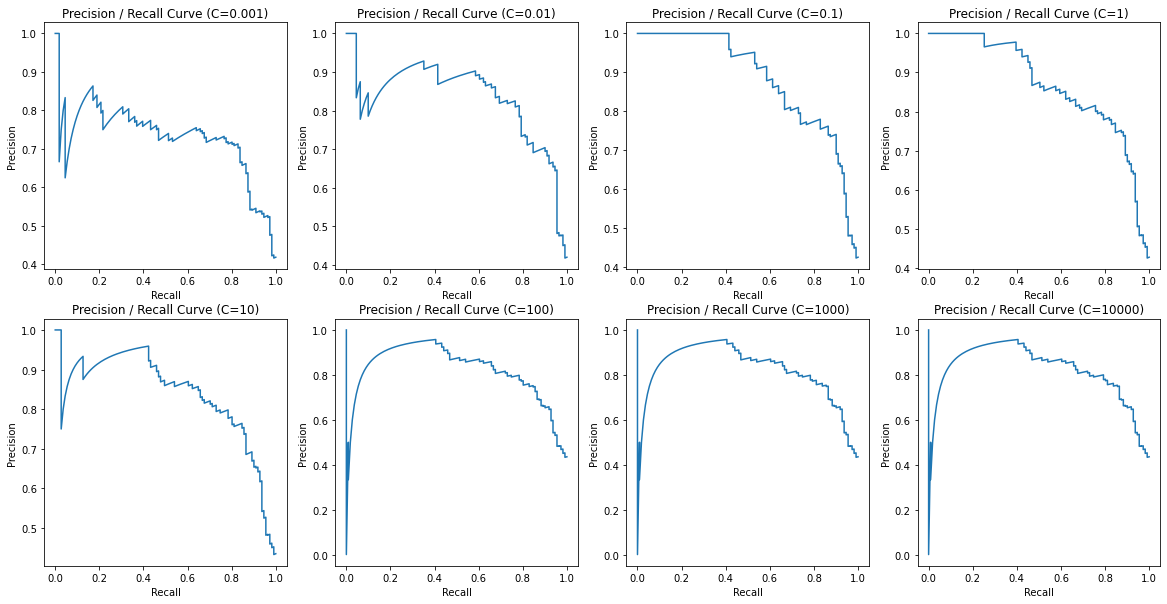

In [24]:
plt.figure(figsize=(20, 10))
for i in range(-3, 5, 1):
    plt.subplot(2, 4, i+4)
    log = LogisticRegression(max_iter=1000, C=10**i, solver = 'newton-cg')
    log_model = log.fit(X_train, y_train)
    test_pred_proba = log_model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, test_pred_proba)
    
    plt.plot(recall, precision)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision / Recall Curve (C={})'.format(10**i))

plt.show()

### Log Loss

In [25]:
print("Log-loss : " , log_loss(y_test, test_pred_proba))

Log-loss :  0.44828260612682136
